# Importando as bibliotecas

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import json
from tqdm import tqdm
import requests
import random as rd

# Carregando os dados dos endereços

Isso é feito para se extrair a média e o desvio padrão dos dados para se fazer os dados.

In [9]:
with open('address_syntetic.txt', 'r') as f:
       data = f.readlines()

for i in range(len(data)):
    data[i] = data[i].replace("\n", "")


# Função que conta número de palaras

In [10]:
def count_word(sentence):
    return len(sentence.split())

# Conta o número de palavras em todos os endereços

In [11]:
n_palavra = []

for i in range(len(data)):
    n_palavra.append(count_word(data[i]))

# Calcula-se a média e a variância dos dados

Isto é feito para mimicar os dados e forçar a rede neural a não olhar o tamanho da frase, mas sim o seu conteúdo.

In [12]:
mean = sum(n_palavra)/len(n_palavra)
print(mean)
std = np.std(n_palavra)
print(std)

8.361576027689535
2.0203157311991995


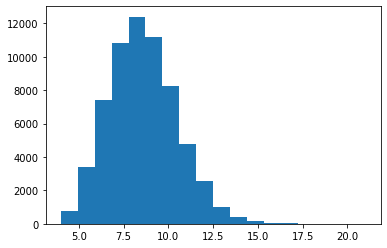

In [17]:
plt.hist(n_palavra, bins = 18)
plt.show()

# Cria a base de dados de frases aleatórias da wikipedia

In [34]:
import spacy
from spacy import displacy
from IPython.core.display import HTML
from spacy.util import minibatch, compounding
from pathlib import Path
from spacy.scorer import Scorer

import random

nlp = spacy.load("pt_core_news_lg")

# A função que irá criar locais

Dado um título da wikipedia, ele ira tentar achar um local no google maps. Irá ler o display_name dele, e irá passar uma IA (spacy) que retirará todos nos nomes que remetem a localizações.

In [47]:
def look_for_a_location(text):
        endereco = text
        response = requests.get(f"https://nominatim.openstreetmap.org/search.php?q={endereco}&format=json&countrycodes=BR&limit=1")
        response.raise_for_status()
        data = response.json()
        loc = []
        if len(data) > 0:
            disp_name = data[0]['display_name']
            endereco  = disp_name
            
            doc = nlp(endereco)
            for ent in doc.ents:
                if ent.label_ == 'LOC':
                    loc.append(ent.text)
        return loc



 # Parte principal da criação de dados
 
 Ele vai criar 3 listas:
 
 * not_addresses: partes de texto aleatória retirar de artigos da wikipedia
 * locais: localizações retiradas do google maps
 * mixed_data: seções de texto que podem conter partes de endereços/locais

In [78]:
not_addresses = []
locais = []
mixed_data = []

wikis = tqdm(open('ptwiki-latest.json', 'r'), position=0, leave=True)

for article in wikis:
    
    article = json.loads(article)

    # txt = article['section_texts'][0]
    if len(locais) < 100:
        wikis.set_postfix({'len(locais)': len(locais)})
        locs = look_for_a_location(article['title'])
        for loc in locs:
            if loc and (not (loc in locais)):
                locais.append(loc)
    for section in article['section_texts']:
        txt = section
        splitted = txt.split()
        words = len(splitted)
        if words>100:
            
            
            random_word_count = int(np.random.normal(loc = mean, scale=std))

            random_start_pos = rd.randint(0,words-random_word_count*2)
            
            selected_txt = " ".join(splitted[random_start_pos:(random_start_pos + random_word_count)])

            for i in range(1,len(splitted)-1):
                juntado = " ".join(splitted[i-1:i+1])
                if juntado in locais:
                    random_word_count = int(np.random.normal(loc = mean, scale=std))
                    start_position = rd.randint(i-random_word_count-1, i+1)
                    mixed_data.append(" ".join(splitted[start_position:(start_position + random_word_count)]))
                
            

            not_addresses.append(selected_txt)
            break



1951it [00:52, 37.02it/s]


KeyboardInterrupt: 

# Salvando as listas

Isto é feito separadamente devido ao tempo de processamento da operação anterior, que é aconselhável terminá-la por volta da iteração 60 000.

In [60]:
with open('not_address_syntetic.txt', 'w') as f:
        for item in not_addresses:
            try:
                f.writelines(["%s\n" % item])
            except:
                pass
        
with open('locais.txt', 'w') as f:
        for item in locais:
            try:
                f.writelines(["%s\n" % item])
            except:
                pass
            
with open('mixed_locais.txt', 'w') as f:
        for item in mixed_data:
            try:
                f.writelines(["%s\n" % item])
            except:
                pass

# Analisando os dados

7.345664739884393
2.066145007969924


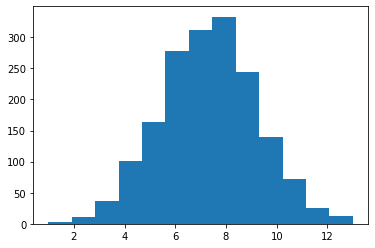

In [80]:
n_palavra = []

for i in range(len(not_addresses)):
    n_palavra.append(count_word(not_addresses[i]))

mean = sum(n_palavra)/len(n_palavra)
print(mean)
std = np.std(n_palavra)
print(std)
plt.hist(n_palavra, bins = 13)
plt.show()

# Mostra exemplos da base de dados

Amostra a base de dados para ver se não deu erro durante a montagem e a base de dados foi montada com sucesso.

In [87]:
with open('address_syntetic3.txt', 'r') as f:
       data = f.readlines()

for i in range(len(data)):
    data[i] = data[i].replace("\n", "")
    
with open('not_address_syntetic.txt', 'r') as f:
       data1 = f.readlines()

for i in range(len(data1)):
    data1[i] = data1[i].replace("\n", "")
    
with open('locais.txt', 'r') as f:
    data2 = f.readlines()

for i in range(len(data2)):
    data2[i] = data2[i].replace("\n", "")

with open('mixed_locais.txt', 'r') as f:
    data3 = f.readlines()

for i in range(len(data3)):
    data3[i] = data3[i].replace("\n", "")

print(len(data))
print(len(data1))
print(len(data2))
print(len(data3))

24718
18955
5000
13917


# Recria os arquivos

Salva com outro nome.

In [88]:

data.extend(data2)
data1.extend(data3)


with open('address_syntetic4.txt', 'w') as f:
        for item in data:
            try:
                f.writelines(["%s\n" % item])
            except:
                pass
            
with open('not_address_syntetic2.txt', 'w') as f:
        for item in data1:
            try:
                f.writelines(["%s\n" % item])
            except:
                pass